<a href="https://colab.research.google.com/github/aml21/Project1/blob/main/Simple_multiple_linear_and_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión lineal simple/múltiple & logístic

Source: Coursera, Advance Data Analytics course.

## 1. Simple linear regression

#### 1st dataset

Import packages

In [ ]:
 import pandas as pd
 import seaborn as sns
 import matplotlib.pyplot as plt
 import statsmodels.api as sm

Load dataset and check it

In [ ]:
# Load dataset
penguins = sns.load_dataset("penguins")
# Examine first 5 rows of dataset
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


From the first 5 rows of the dataset, we can see that there are several columns available: species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, and sex. There also appears to be some missing data.

Data cleaning

 For the purposes of this course, we are focusing our analysis on Adelie and Gentoo penguins, and will be dropping any missing values from the dataset. In a work setting, you would typically
 examine the data more thoroughly before deciding how to handle missing data (i.e., fill in, drop,
 etc.). Please refer back to previous program content if you need to review how to handle missing data.


In [ ]:
# Keep Adelie and Gentoo penguins, drop missing values
penguins_sub = penguins[penguins["species"] != "Chinstrap"]
penguins_final = penguins_sub.dropna()
penguins_final.reset_index(inplace=True, drop=True)

You can review the documentation for dropna() and reset_index(). In short, the dropna() function by default removes any rows with any missing values in any of the columns. The reset_index() function resets the index values for the rows in the dataframe. Typically, you use reset_index() after you’ve finished manipulating the dataset. By setting inplace=True, you will not create a new DataFrame object. By setting drop=True, you will not insert a new index column into the DataFrame object.

**Exploratory data analysis**

Before you construct any model, it is important to get more familiar with your data. You can do so by performing exploratory data analysis or EDA. Please review previous program materials as needed if you would like to refamiliarize yourself with EDA concepts.

Since this part of the course focuses on simple linear regression, you want to check for any linear relationships among variables in the dataframe. You can do this by creating scatterplots using any data visualization package, for example matplotlib.plt, seaborn, or plotly.

To visualize more than one relationship at the same time, we use the pairplot() function from the seaborn package to create a scatterplot matrix.


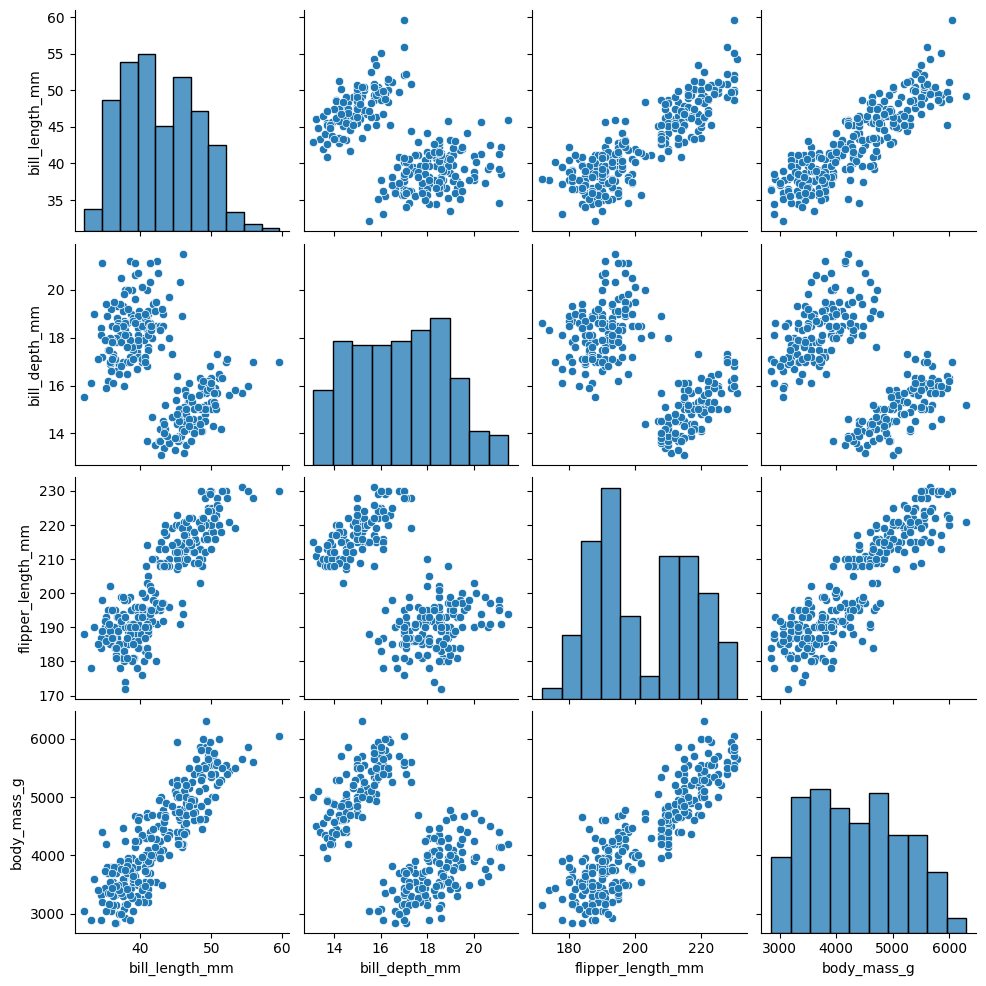

In [ ]:
# Create pairwise scatterplots of data set
sns.pairplot(penguins_final)

From the scatterplot matrix, you can observe a few linear relationships: * bill length (mm) and
 flipper length (mm) * bill length (mm) and body mass (g) * flipper length (mm) and body mass
 (g).

**Model construction**

Based on the above scatterplots, you could probably run a simple linear regression on any of the three relationships identified. For this part of the course, you will focus on the relationship between bill length (mm) and body mass (g).

To do this, you will first subset the variables of interest from the dataframe. You can do this by using double square brackets [[]], and listing the names of the columns of interest.


In [ ]:
# Subset Data
ols_data = penguins_final[["bill_length_mm", "body_mass_g"]]

Next, you can construct the linear regression formula, and save it as a string. Remember that the y or dependent variable comes before the ~, and the x or independent variables comes after the ~.

**Note:** The names of the x and y variables have to exactly match the column names in the dataframe.

In [ ]:
# Write out formula
ols_formula = "body_mass_g ~ bill_length_mm"

Lastly, you can build the simple linear regression model in statsmodels using the ols() function.

You can import the ols() function directly using the line of code below.

In [ ]:
# Import ols function
from statsmodels.formula.api import ols

Then, you can plug in the ols_formula and ols_data as arguments in the ols() function. After you save the results as a variable, you can call on the fit() function to actually fit the model to the data.

In [ ]:
# Build OLS, fit model to data
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()

Lastly, you can call the summary() function on the model object to get the coefficients and more statistics about the model. The output from model.summary() can be used to evaluate the model and interpret the results. Later in this section, we will go over how to read the results of the model output.

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     874.3
Date:                Sat, 14 Jun 2025   Prob (F-statistic):           1.33e-85
Time:                        03:48:06   Log-Likelihood:                -1965.8
No. Observations:                 265   AIC:                             3936.
Df Residuals:                     263   BIC:                             3943.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1707.2919    205.640     -8.302      0.000   -2112.202   -1302.382
bill_length_mm   141.1904      4.775     29.569      0.000     131.788     150.592
==============================================================================
Omnibus:                        2.060   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                2.103
Skew:                           0.210   Prob(JB):                        0.349
Kurtosis:                       2.882   Cond. No.                         357.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

You can use the regplot() function from seaborn to visualize the regression line.

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

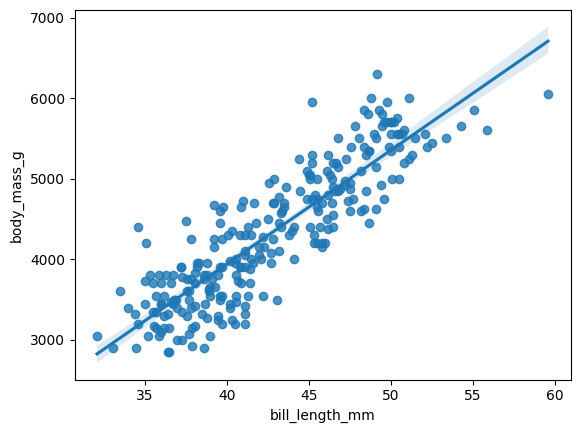

In [ ]:
sns.regplot(x = "bill_length_mm", y = "body_mass_g", data = ols_data)

**Finish checking model assumptions**

 As you learned in previous videos, there are four main model assumptions for simple linear regression, in no particular order: 1. Linearity 2. Normality 3. Independent observations 4. Homoscedasticity

 You already checked the linearity assumption by creating the scatterplot matrix. The independent observations assumption is more about data collection. There is no reason to believe that one penguin’s body mass or bill length would be related to any other penguin’s anatomical measurements. So we can check off assumptions 1 and 3.

 The normality and homoscedasticity assumptions focus on the distribution of errors. Thus, you can only check these assumptions after you have constructed the model. To check these assumptions, you will check the residuals, as an approximation of the errors.

To more easily check the model assumptions and create relevant visualizations, you can first subset the X variable by isolating just the bill_length_mm column. Additionally, you can save the predicted values from the model using the model.predict(X) function.


In [ ]:
# Subset X variable
X = ols_data["bill_length_mm"]
# Get predictions from model
fitted_values = model.predict(X)

Then, you can save the model residuals as a variable by using the model.resid attribute.

In [ ]:
# Calculate residuals
residuals = model.resid

**Check the normality assumption**

 To check the normality assumption, you can create a histogram of the residuals using the
 histplot() function from the seaborn package.

 From the below histogram, you may notice that the residuals are almost normally distributed. In this case, it is likely close enough that the assumption is met.


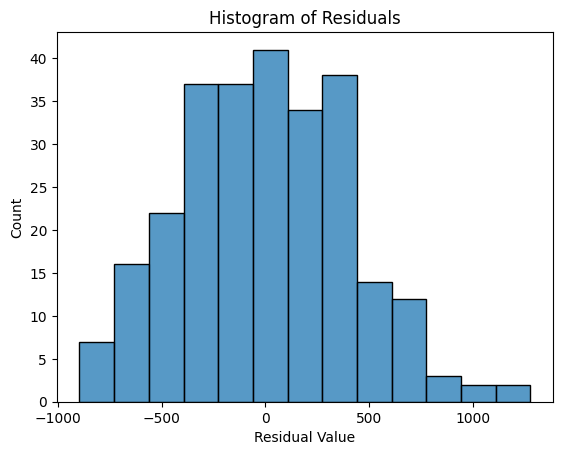

In [ ]:
import matplotlib.pyplot as plt
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

Another way to check the normality function is to create a quantile-quantile or Q-Q plot. Recall that if the residuals are normally distributed, you would expect a straight diagonal line going from the bottom left to the upper right of the Q-Q plot. You can create a Q-Q plot by using the qqplot function from the statsmodels.api package.

The Q-Q plot shows a similar pattern to the histogram, where the residuals are mostly normally distributed, except at the ends of thedistribution.


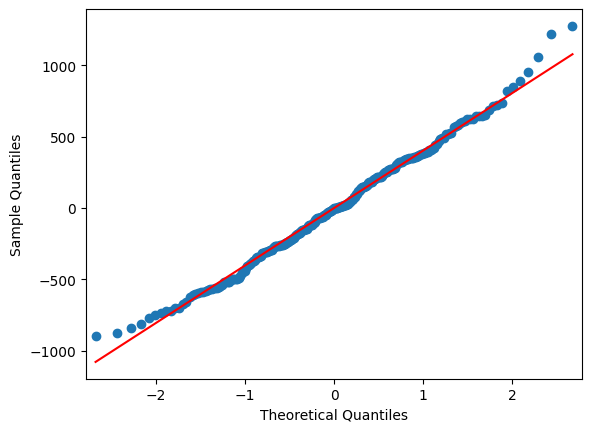

In [ ]:
fig = sm.qqplot(model.resid, line = 's')
plt.show()

**Check the homoscedasticity assumption**

 Lastly, we have to check the homoscedasticity assumption. To check the homoscedasticity assumption, you can create a scatterplot of the fitted values and residuals. If the plot resembles a random cloud (i.e., the residuals are scattered randomly), then the assumption is likely met.

You can create one scatterplot by using the scatterplot() function from the seaborn package. The first argument is the variable that goes on the x-axis. The second argument is the variable that goes on the y-axis.


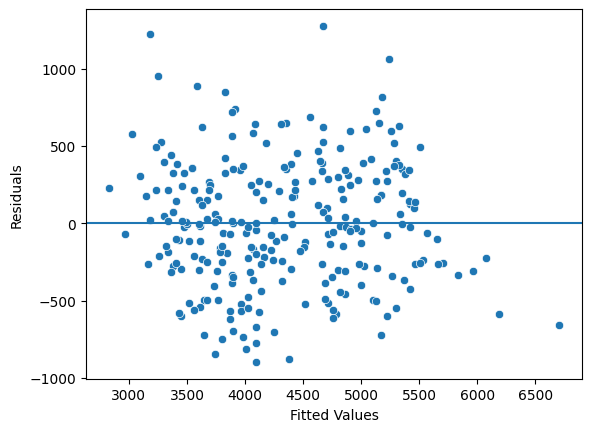

In [ ]:
# Import matplotlib
import matplotlib.pyplot as plt
fig = sns.scatterplot(x=fitted_values, y=residuals)

# Add reference line at residuals = 0
fig.axhline(0)

# Set x-axis and y-axis labels
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")

# Show the plot
plt.show()

#### 2nd dataset

The dataset provided includes information about marketing campaigns across TV, radio, and social media, as well as how much revenue in sales was generated from these campaigns. Based on this information, company leaders will make decisions about where to focus future marketing resources. Therefore, it is critical to provide them with a clear understanding of the relationship between types of marketing campaigns and the revenue generated as a result of this investment.

In [ ]:
# Import relevant Python libraries and modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Load the dataset into a DataFrame and save in a variable
data = pd.read_csv("/content/marketing_sales_data.csv")

Data Exploration

In [ ]:
# Display number of rows, number of columns
print(data.shape)
print()

# Display the first 5 rows of the data
print(data.head(5))

(572, 5)

       TV      Radio  Social Media Influencer       Sales
0     Low   1.218354      1.270444      Micro   90.054222
1  Medium  14.949791      0.274451      Macro  222.741668
2     Low  10.377258      0.061984       Mega  102.774790
3    High  26.469274      7.070945      Micro  328.239378
4    High  36.876302      7.618605       Mega  351.807328


**Observations:** The data includes the following information:

    – TVpromotion budget (expressed as “Low”, “Medium”, or “High”)
    – Radio promotion budget
    – Social media promotion budget
    – Type of influencer that the promotion is in collaboration with (expressed as “Mega”,  
    “Macro”, or “Micro”, or “Nano”)
    ∗ Note: Mega-influencers have over 1 million followers, macro
    – influencers have 100,000 to 1 million followers, micro-influencers have 10,000 to 100,000 followers, and nano influencers have fewer than 10,000 followers.
    – Sales accrued from the promotion

The reare 572 rows and 5 columns in the data. One way to interpret this is that 572 companies are represented in the data, along with 5 aspects about each company that reveals how they promote their products/services and the sales accrued from their promotion.

Now, check for missing values in the rows of the data. This is important because missing values are not that meaningful when modeling the relationship between two variables. To do so, begin by getting Booleans that indicate whether each value in the data is missing. Then, check both columns and rows for missing values.

In [ ]:
# Step 1. Start with .isna() to get booleans indicating whether each value in the data is missing
data.isna()

,TV,Radio,Social Media,Influencer,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
567,False,False,False,False,False
568,False,False,False,False,False
569,False,False,False,False,False
570,False,False,False,False,False


If you would like to read more about the isna() function, feel free to refer to its documentation, available in the references section of this lab.

In [ ]:
# Step 1. Start with .isna() to get booleans indicating whether each value in the data is missing
# Step 2. Use .any(axis=1) to get booleans indicating whether there are any missing values along the columns in each row

### YOUR CODE HERE ###
data.isna().any(axis=1)

,0
0,False
1,False
2,False
3,False
4,False
...,...
567,False
568,False
569,False
570,False


If you would like to read more about the any() function, feel free to refer to its documentation, available in the references section of this lab.

In [ ]:
# Step 1. Start with .isna() to get booleans indicating whether each value in the data is missing
# Step 2. Use .any(axis=1) to get booleans indicating whether there are any missing values along the columns in each row
# Step 3. Use .sum() to get the number of rows that contain missing values
data.isna().any(axis=1).sum()

np.int64(3)

Observation:

 • There are 3 rows containing missing values, which is not that many, considering the total
 number of rows. It would be appropriate to drop these rows that contain missing values to
 proceed with preparing the data for modeling.

 **Drop the rows that contain missing values.**

 This is an important step in data cleaning, as it makes the data more usable for the analysis and regression that you will conduct next.


In [ ]:
# Step 1. Use .dropna(axis=0) to indicate that you want rows which contain missing values to be dropped
# Step 2. To update the DataFrame, reassign it to the result
data = data.dropna(axis=0)

# Check to make sure that the data does not contain any rows with missing values now
# Step 1. Start with .isna() to get booleans indicating whether each value in the data is missing
# Step 2. Use .any(axis=1) to get booleans indicating whether there are any missing values along the columns in each row
# Step 3. Use .sum() to get the number of rows that contain missing values
data.isna().any(axis=1).sum()

np.int64(0)

**Check model assumptions.**

You would like to explore the relationship between radio promotion budget and sales. You could model the relationship using linear regression. To do this, you want to check if the model assumptions for linear regression can be made in this context. Some of the assumptions can be addressed before the model is built — you will address those in this section. After the model is built, you can finish checking the assumptions.

 **Start by creating a plot of pairwise relationships in the data.**

This will help you visualize the relationships between variables in the data and help you check
 model assumptions.


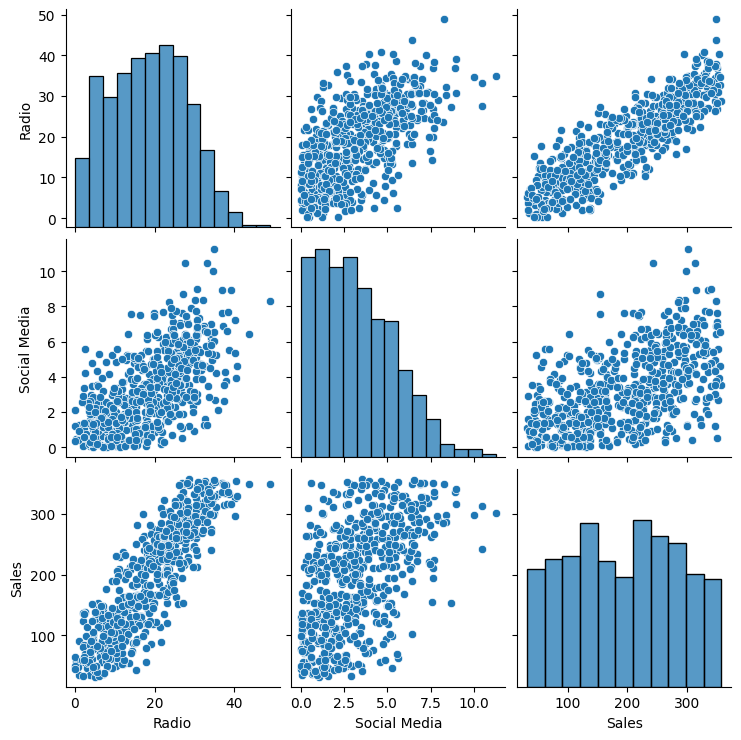

In [ ]:
# Create plot of pairwise relationships
sns.pairplot(data)

**Observations**

In the scatter plot of Sales over Radio, the points appear to cluster around a line that indicates a positive association between the two variables. Since the points cluster around a line, it seems the assumption of linearity is met.


**Model Building**

Start by selecting only the columns that are needed for the model that you will build from the data.

In [ ]:
# Select relevant columns
# Save resulting DataFrame in a separate variable to prepare for regression
ols_data = data[["Radio", "Sales"]]

# Display first 5 rows of the new DataFrame
ols_data.head(5)

,Radio,Sales
0,1.218354,90.054222
1,14.949791,222.741668
2,10.377258,102.774790
3,26.469274,328.239378
4,36.876302,351.807328


Write the linear regression formula for modeling the relationship between the two variables of interest.

In [ ]:
# Write the linear regression formula
# Save it in a variable
ols_formula = "Sales ~ Radio"

Implement the Ordinary Least Squares(OLS) approach for linear regression.

In [ ]:
# Implement OLS
OLS = ols(formula = ols_formula, data = ols_data)

Create a linear regression model for the data and fit the model to the data.

In [ ]:
# Fit the model to the data
# Save the fitted model in a variable
model = OLS.fit()

**Results and Evaluation**

**Get a summary of the results from the model.**

In [ ]:
# Get summary of results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1768.
Date:                Sat, 14 Jun 2025   Prob (F-statistic):          2.07e-176
Time:                        15:25:37   Log-Likelihood:                -2966.7
No. Observations:                 569   AIC:                             5937.
Df Residuals:                     567   BIC:                             5946.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5326      4.067     10.211      0.000      33.544      49.521
Radio          8.1733      0.194     42.048      0.000       7.791       8.555
==============================================================================
Omnibus:                        2.267   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                2.221
Skew:                          -0.102   Prob(JB):                        0.329
Kurtosis:                       2.772   Cond. No.                         45.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Analyze the bottom table from the results summary.**

Based on that table, identify the coefficients that the model determined would generate the line of best fit, the coefficients here being the y-intercept and the slope.

What is the y-intercept?

    • The y-intercept is 41.5326.

What is the slope?

    • The slope is 8.1733.

What is the linear equation you would write to express the relationship between sales and radio promotion budget in the form of y = slope * x + y-intercept?

    • sales = 8.1733 * radio promotion budget + 41.5326

Interpretation:

    • One interpretation: If a company has a budget of 1 million dollars more for promoting their products/services on the radio, the company’s sales would increase by 8.1733 million dollars on average.
    • Another interpretation: Companies with 1 million dollars more in their radio promotion budget accrue 8.1733 million dollars more in sales on average.

**Finish checking model assumptions.**

Now that you’ve built the linear regression model and fit it to the data, you can finish checking the model assumptions. This will help confirm your findings.

**Plot the OLS data with the best fit regression line.**


<Axes: xlabel='Radio', ylabel='Sales'>

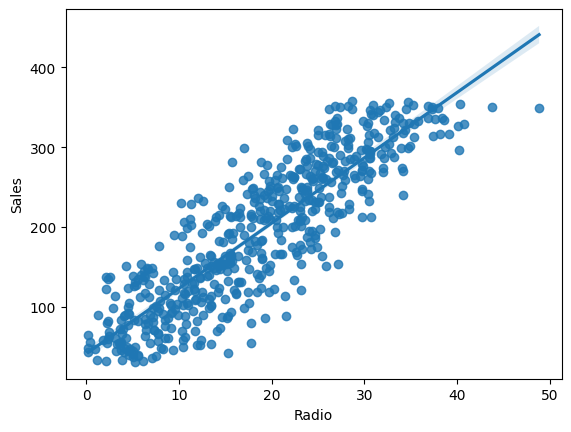

In [ ]:
# Plot the OLS data with the best fit regression line
sns.regplot(x = "Radio", y = "Sales", data = ols_data)

Observations:

    • The preceding regression plot illustrates an approximately linear relationship between the two variables along with the best fit line. This confirms the assumption of linearity.

**Check the normality assumption.**

To get started, get the residuals from the model.


In [ ]:
# Get the residuals from the model
residuals = model.resid

You can call the resid attribute from the statsmodels library.

Visualize the distribution of the residuals.

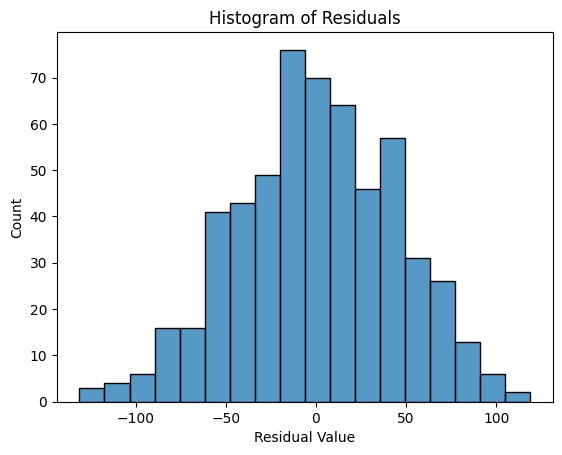

In [ ]:
# Visualize the distribution of the residuals
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

Observation about the distribution of the residuals:

    • Based on the preceding visualization, the distribution of the residuals is approximately normal. This indicates that the assumption of normality is likely met.

**Create a Q-Q plot to confirm the assumption of normality.**


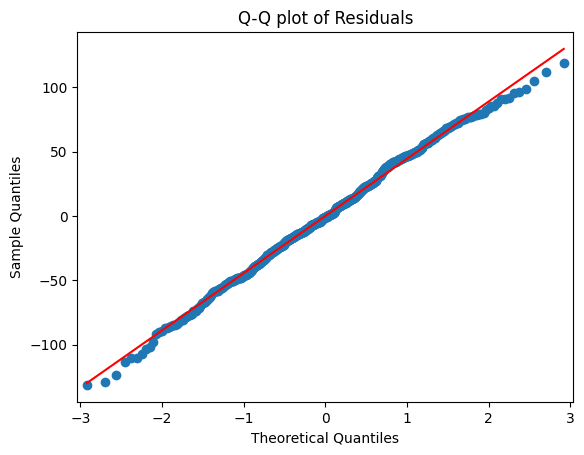

In [ ]:
# Create a Q-Q plot
sm.qqplot(residuals, line='s')
plt.title("Q-Q plot of Residuals")
plt.show()

Is the assumption of normality met?

    Yes it is, In the preceding Q-Q plot, the points are very close of the straight diagonal line. This means that the normality assumption is met.



**Check the assumptions of independent observation and homoscedasticity.**

Start by getting the fitted values from the model.

In [ ]:
# Get fitted values
fitted_values = model.predict(ols_data["Radio"])

You can call the predict() function from the statsmodels library. Make sure to pass in the column from ols_data corresponding to the x variable.

**Create a scatterplot of the residuals against the fitted values.**


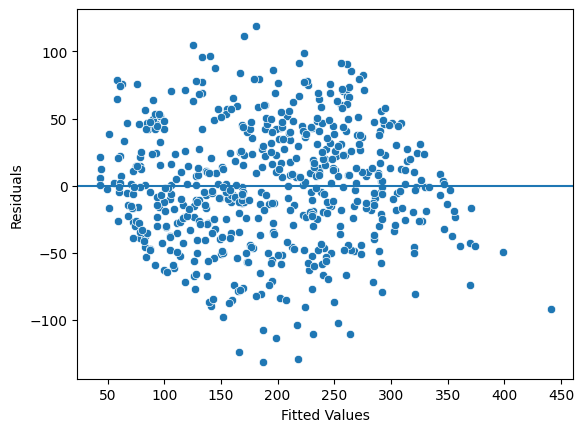

In [ ]:
# Create a scatterplot of residuals against fitted values
fig = sns.scatterplot(x=fitted_values, y=residuals)
fig.axhline(0)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
plt.show()

Are the assumptions of independent observation and homoscedasticity met?

Data distribution observed in previous graph is like a cloud, that means points do not follow a specific pattern, residuals appear randomly distributed, this is an indicator of homoscedasticity is met.


**Conclusion**

Key takeaways from this lab?

Linear regression model’s requirements can be identified using data visualization and EDA, special model to study the relationship between 2 variables.

What results can be presented from this lab?

Some examples are the y-intercept is 41.5326 and the slope is 8.1733. On average, a company’s sales will increase by 8.1733 million dollars if they invest 1 million dollars in radio media.

A small p-value of 0.000 indicates results statistically significant, small compared with 0.05 of significance value, that means a very low probability of observing data as extreme or more when the null hypothesis is true in this dataset. A null hypothesis indicates a no relationship between radio promotion budget and sales, this null hypothesis can be rejected, alternative hypothesis is accepted, this refers there is a relationship between 2 variables, slope is not zero.  We can not define exactly the slope, but we can say that thanks to the 95% confidence level for the slope is 7.791 to 8.555, this means there is a 95% probability that the slope true value can be found between this range.

How would you frame your findings to external stakeholders?

Based on the regression analysis applied to the dataset, the relationship between variables radio promotion budget and sales for companies is notable and supported by a p-value of 0.000 & standard error of 0.194. This means if a company represented by this dataset invests 1 million dollar in radio promotion budged an increase of 8.1733 million dollar in sales could be expected.  

Based on the dataset at hand and the regression analysis conducted here, there is a notable relationship between the radio promotion budget and sales for companies in this data, with a p-value of 0.000 and standard error of 0.194. For companies represented by this data, a 1 million dollar increase in radio promotion budget could be associated with an 8.1733 million dollar increase in sales, this becomes radio promotion very interesting tool to increase sales, but it is necessary to take into account the nuances of each company and industry.



## 2. Simple linear regression, Evaluate

For this activity, you are part of an analytics team that provides insights about marketing and sales. You have been assigned to a project that focuses on the use of influencer marketing, and you would like to explore the relationship between marketing promotional budgets and sales. The dataset provided includes information about marketing campaigns across TV, radio, and social media, as well as how much revenue in sales was generated from these campaigns. Based on this information, leaders in your company will make decisions about where to focus future marketing efforts, so it is critical to have a clear understanding of the relationship between the different types of marketing and the revenue they generate.

 This activity will develop your knowledge of linear regression and your skills evaluating regression results which will help prepare you for modeling to provide business recommendations in the future.


**Import packages**

Import relevant Python libraries and packages. In this activity, you will need to use pandas, pyplot
from matplotlib, and seaborn.

**Import the statsmodel module and the ols function**

Import the statsmodels.api Python module using its common abbreviation, sm, along with the ols() function from statsmodels.formula.api. To complete this, you will need to write the imports as well.

In [ ]:
# Import pandas, pyplot from matplotlib, and seaborn.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the statsmodel module.
import statsmodels.api as sm

# Import the ols function from statsmodels.
from statsmodels.formula.api import ols

Load the dataset

Load the provided dataset marketing_and_sales_data_evaluate_lr.csv as data and display the first five rows. This is a fictional dataset that was created for educational purposes. The variables in the dataset have been kept as is to suit the objectives of this activity.


In [ ]:
# Load the data.
data = pd.read_csv('/content/sample_data/marketing_and_sales_data_evaluate_lr.csv')

# Display the first five rows.
print(data.head(5))

     TV      Radio  Social_Media       Sales
0  16.0   6.566231      2.907983   54.732757
1  13.0   9.237765      2.409567   46.677897
2  41.0  15.886446      2.913410  150.177829
3  83.0  30.020028      6.922304  298.246340
4  15.0   8.437408      1.405998   56.594181


**Data exploration**

**Familiarize yourself with the data’s features**

Start with an exploratory data analysis to familiarize yourself with the data and prepare it for modeling. The features in the data are: * TV promotion budget (in millions of dollars) * Social media promotion budget (in millions of dollars) * Radio promotion budget (in millions of dollars) * Sales (in millions of dollars)

Each row corresponds to an independent marketing promotion where the business invests in TV, Social_Media, and Radio promotions to increase Sales.

The business would like to determine which feature most strongly predicts Sales so they have a better understanding of what promotions they should invest in in the future. To accomplish this, you’ll construct a simple linear regression model that predicts sales using a single independent variable.

**Explore the data size**

Calculate the number of rows and columns in the data.


In [ ]:
# Display the shape of the data as a tuple (rows, columns).
print(data.shape)

(4572, 4)


**Explore the independent variables**

There are three continuous independent variables: TV, Radio, and Social_Media. To understand how heavily the business invests in each promotion type, use describe() to generate descriptive statistics for these three variables.

In [ ]:
# Generate descriptive statistics about TV, Radio, and Social_Media.
data[['TV', 'Radio','Social_Media']].describe(include='all')

,TV,Radio,Social_Media
count,4562.000000,4568.000000,4566.000000
mean,54.066857,18.160356,3.323956
std,26.125054,9.676958,2.212670
min,10.000000,0.000684,0.000031
25%,32.000000,10.525957,1.527849
50%,53.000000,17.859513,3.055565
75%,77.000000,25.649730,4.807558
max,100.000000,48.871161,13.981662


**Explore the dependent variable**

Before fitting the model, ensure the Sales for each promotion (i.e., row) is present. If the Sales in a row is missing, that row isn’t of much value to the simple linear regression model. Display the percentage of missing values in the Sales column in the DataFrame data.


In [ ]:
# Calculate the average missing rate in the sales column.
missing_sales = data.Sales.isna().mean()

# Convert the missing_sales from a decimal to a percentage and round to 2 decimal places.
missing_sales = round(missing_sales*100, 2)

# Display the results (missing_sales must be converted to a string to be concatenated in the print statement).
print('Percentage of promotions missing Sales: ' + str(missing_sales) + '%')

Percentage of promotions missing Sales: 0.13%


What do you observe about the percentage of missing values in the Sales column?

0.13% of Sales rows have missing values.

**Remove the missing data**

Remove all rows in the data from which Sales is missing.


In [ ]:
# Subset the data to include rows where Sales is present.
data = data.dropna(subset = ['Sales'], axis = 0)

**Visualize the sales distribution**

Create a histogram to visualize the distribution of Sales.

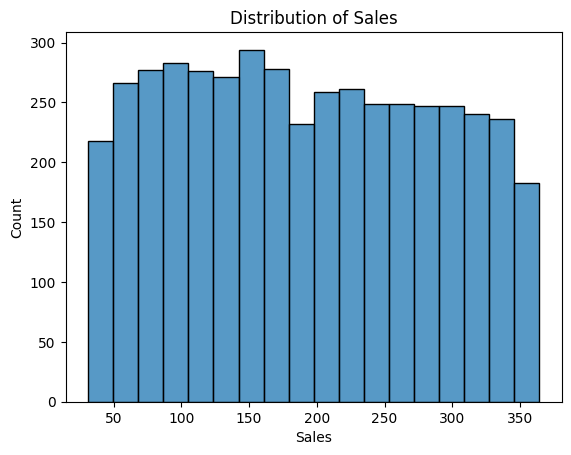

In [ ]:
# Create a histogram of the Sales.
fig = sns.histplot(data['Sales'])

# Add a title
fig.set_title('Distribution of Sales');

What do you observe about the distribution of Sales from the preceding histogram?

Generally, Sales are almost equally distributed between 200 and 300 million.

**Model building**

Create a pairplot to visualize the relationships between pairs of variables in the data. You will use this to visually determine which variable has the strongest linear relationship with Sales. This will help you select the X variable for the simple linear regression.


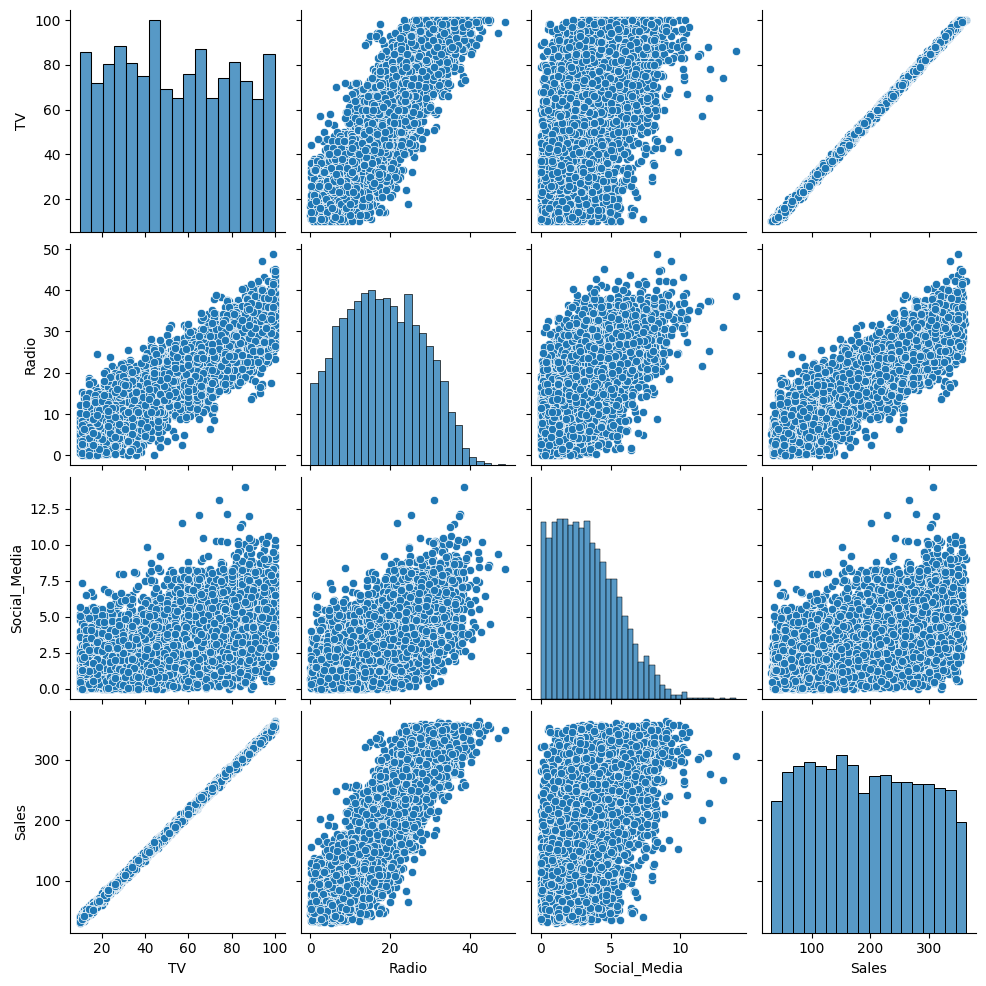

In [ ]:
# Create a pairplot of the data.
sns.pairplot(data);

Which variable did you select for X? Why?

TV shows an almost complete linear relationship with Sales, it appear like a straight line with positive relationship.

**Build and fit the model**

Replace the comment with the correct code. Use the variable you chose for X for building the model.


In [ ]:
# Define the OLS formula.
ols_formula = 'Sales ~ TV'

# Create an OLS model.
OLS = ols(formula = ols_formula, data = data)

# Fit the model.
model = OLS.fit()

# Save the results summary.
model_results = model.summary()

# Display the model results.
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Sat, 14 Jun 2025   Prob (F-statistic):               0.00
Time:                        20:57:01   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.209      -0.323       0.071
TV             3.5614      0.002   2127.776      0.000       3.558       3.565
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.030
Skew:                           0.001   Prob(JB):                        0.985
Kurtosis:                       3.012   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Check model assumptions**

 To justify using simple linear regression, check that the four linear regression assumptions are not violated. These assumptions are:

    • Linearity
    • Independent Observations
    • Normality
    • Homoscedasticity

**Model assumption: Linearity**

The linearity assumption requires a linear relationship between independent and dependent variables. Check this assumption by creating a scatterplot comparing the independent variable with the dependent variable.

Create a scatterplot comparing the X variable you selected with the dependent variable.



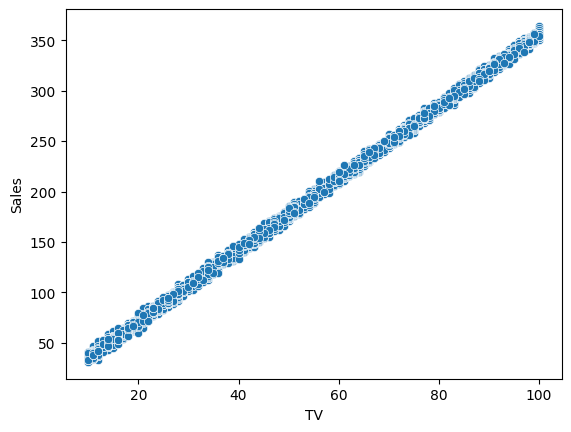

In [ ]:
# Create a scatterplot comparing X and Sales (Y).
sns.scatterplot(x = data['TV'], y = data['Sales']);

Is the linearity assumption met?

Yes, it is, there is a strong linear relationship between TV and Sales

**Model assumption: Independence**

The independent observation assumption states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

 **Model assumption: Normality**

The normality assumption states that the errors are normally distributed.

Create two plots to check this assumption:

    • Plot 1: Histogram of the residuals
    • Plot 2: Q-Q plot of the residuals


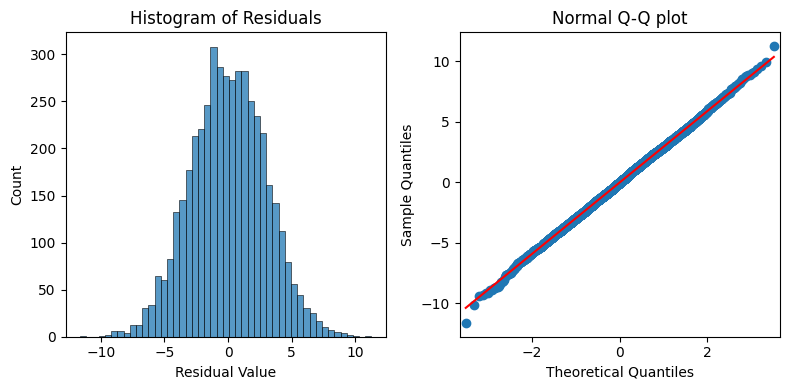

In [ ]:
# Calculate the residuals.
residuals = model.resid

# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a histogram with the residuals .
sns.histplot(residuals, ax=axes[0])

# Set the x label of the residual plot.
axes[0].set_xlabel("Residual Value")

# Set the title of the residual plot.
axes[0].set_title("Histogram of Residuals")

# Create a Q-Q plot of the residuals.
sm.qqplot(residuals, line='s',ax = axes[1])

# Set the title of the Q-Q plot.
axes[1].set_title("Normal Q-Q plot")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

# Show the plot.
plt.show()

**Is the normality assumption met?**

As you can see in the histogram the residuals are almost normally distributed, for that reason normality assumption is met. Also, the residuals in the Q-Q plot form a straight line, this also is supporting that the normality assumption is met.

**Model assumption: Homoscedasticity**

**Note:** The homoscedasticity (constant variance) assumption is that the residuals have a constant variance for all values of X.

Check that this assumption is not violated by creating a scatterplot with the fitted values and residuals. Add a line at y = 0 to visualize the variance of residuals above and below y = 0.


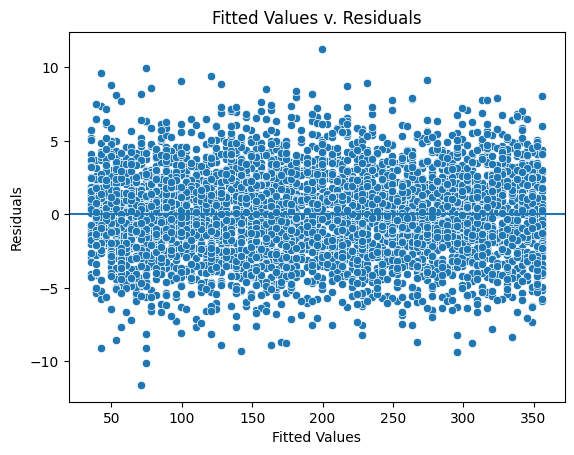

In [ ]:
# Create a scatterplot with the fitted values from the model and the residuals.
fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

# Set the x-axis label.
fig.set_xlabel("Fitted Values")

# Set the y-axis label.
fig.set_ylabel("Residuals")

# Set the title.
fig.set_title("Fitted Values v. Residuals")

# Add a line at y = 0 to visualize the variance of residuals above and below 0.
fig.axhline(0)

# Show the plot.
plt.show()

Is the homoscedasticity assumption met?

As you can see from the previous graph the residuals are distributed like a cloud, so, the assumption of homoscedasticity is met.

**Results and evaluation**

**Display the OLS regression results**

 If the linearity assumptions are met, you can interpret the model results accurately.

Display the OLS regression results from the fitted model object, which includes information about the dataset, model fit, and coefficients.

In [ ]:
# Display the model_results defined previously.
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Sat, 14 Jun 2025   Prob (F-statistic):               0.00
Time:                        20:57:01   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.209      -0.323       0.071
TV             3.5614      0.002   2127.776      0.000       3.558       3.565
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.030
Skew:                           0.001   Prob(JB):                        0.985
Kurtosis:                       3.012   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared on the preceding output measures the proportion of variation in the dependent variable (Y) explained by the independent variable (X). What is your interpretation of the model’s R-squared?

 Using TV as X results in a simple linear regression model with R2 = 0.999. In other words, TV explains 99.9% of the variation in Sales.

The R-squared value will depend on the variable selected for X.

**Interpret the model results**

With the model fit evaluated, you can assess the coefficient estimates and the uncertainty of these estimates.

Based on the preceding model results, what do you observe about the coefficients?

 When TV is used as the independent variable X, the coefficient for the Intercept is-0.1263 and
 the coefficient for TV is 3.5614.

 How would you write the relationship between X and Sales in the form of a linear
 equation?

 When TV is used as the independent variable X, the linear equation is:

 Y = Intercept + Slope ∗ X

 Sales (in millions) = Intercept + Slope ∗ TV (in millions)

 Sales (in millions) = −0.1263 + 3.5614 ∗ TV (in millions)

Based on this model, what is your interpretation of the relationship between X and Sales?

 According to the model, when TV is used as the independent variable X, an increase of one million dollars for the TV promotional budget results in an estimated 3.5614 million dollars more in sales.

Why is it important to interpret the beta coefficients?

Beta coefficients allow you to estimate the magnitude and direction (positive or negative) of the effect of each independent variable on the dependent variable. The coefficient estimates can be converted to explainable insights, such as the connection between an increase in TV promotional budgets and sales mentioned previously.

**Measure the uncertainty of the coefficient estimates**

Model coefficients are estimated. This means there is an amount of uncertainty in the estimate. A p-value and 95% confidence interval are provided with each coefficient to quantify the uncertainty for that coefficient estimate.

Display the model results again.


In [ ]:
# Display the model_results defined previously.
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Sat, 14 Jun 2025   Prob (F-statistic):               0.00
Time:                        20:57:01   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.209      -0.323       0.071
TV             3.5614      0.002   2127.776      0.000       3.558       3.565
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.030
Skew:                           0.001   Prob(JB):                        0.985
Kurtosis:                       3.012   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on this model, what is your interpretation of the p-value and confidence interval for the coefficient estimate of X?

Using TV variable as independent variable we get a p-value of 0.000 and a 95% confidence interval of [3.558, 3.565], that means there is a 95% probability that the slope true value is contained in the previous interval with a very low level of uncertainty.

Based on this model, what are you interested in exploring?

 Potential areas to explore include:

    • Point out the business with the possible sales increment  with TV promotional budgets
    • Maybe using 2 independent variables like TV and Radio it is possible to get a better result.
    • Explain the argument with plots and model table could be great to share case insights.

What recommendations would you make to the leadership at your organization?

TV has the strongest linear relationship of the 3 available promotion types. The model shows that if a company invest 1 million dollars in TV promotion budget it could result in an increase of 3.5614 million dollars in Sales, this is supported by a very low p-value of 0.000, so, TV promotion is very recommended to increase sales.


**Considerations**

What are some key takeaways that you learned from this lab?

• EDA is useful to identify linearity relationship between dependent and independent variables.

• Previous response also is useful to identify if linearity assumptions are met before model creation.

• R-squared is a useful measure of prediction error.

• Confidence intervals and p-value are important to provide measures of uncertainty.

 What findings would you share with others?

 • Sales is relatively equally distributed between \$200 and \$300 million across all promotions.

 • The variable that has strongest linear relationship with sales TV, just we should take care of variance between both variables , Radio and sales have a moderate relationship, finally, Social has a weak linear relationship with Sales.

 • The R-squared for the simple linear regression model estimating sales is 0.999, the slope of the coefficient for TV has a p-value of 0.000, a 95% confidence interval of [3.558, 3.565]. and the coefficient for the intercept is -0.1263 and the coefficient for TV is 3.5614, when TV is used as the independent variable,

How would you frame your findings to stakeholders?

•  By far TV has the strongest positive linear relationship with sales, Social Media and Radio have a moderate relationship.

• The variation in sales is explained by the linear regression model at 99.9% as estimation, that means almost all variation in sales can be explained by TV promotion, because that is highly recommended to increase sales.


## 3. Multiple linear regression, Interpret results

#### 1st data set

Import libraries and document

In [ ]:
# import packages
import pandas as pd
import seaborn as sns

# Load dataset
penguins = sns.load_dataset("penguins", cache=False)

# Examine first 5 rows of dataset
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


From the first 5 rows of the dataset, we can see that there are several columns available: species,  island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, and sex. There also appears to be some missing data.

**Data cleaning (not shown in video)**

Clean the dataset by subsetting for specific columns, renaming columns, dropping rows with missing values, and resetting the index. For the purposes of this exercise, we will be focusing on the body_mass_g, bill_length_mm, sex, and species columns. In a work setting, you will need to make careful decisions about which variables to include or exclude. Later in this course, we will cover some of the techniques for variable selection. For now, our focus in just on building the model, and evaluating and interpreting the results.

**Note:** For the purposes of this exercise, we did not examine the data thoroughly before dropping rows with missing data. In a work setting, you would typically examine the data more thoroughly before deciding how to handle missing data (i.e., fill in, drop, etc.). Please refer back to previous program content if you need to review how to handle missing data.


In [ ]:
# Subset data
penguins = penguins[["body_mass_g", "bill_length_mm", "sex", "species"]]

# Rename columns
penguins.columns = ["body_mass_g", "bill_length_mm", "gender", "species"]

# Drop rows with missing values
penguins.dropna(inplace=True)

# Reset index
penguins.reset_index(inplace=True, drop=True)

<ipython-input-2-1658496087>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins.dropna(inplace=True)


You can review the documentation for dropna() and reset_index(). In short, the dropna() function by default removes any rows with any missing values in any of the columns. The reset_index() function resets the index values for the rows in the dataframe. Typically, you use reset_index() after you’ve finished manipulating the dataset. By setting inplace=True, you will not create a new DataFrame object. By setting drop=True, you will not insert a new index column into the DataFrame object.

In [ ]:
# Examine first 5 rows of data
penguins.head(5)

,body_mass_g,bill_length_mm,gender,species
0,3750.0,39.1,Male,Adelie
1,3800.0,39.5,Female,Adelie
2,3250.0,40.3,Female,Adelie
3,3450.0,36.7,Female,Adelie
4,3650.0,39.3,Male,Adelie


**Create holdout sample**

Earlier, you learned about creating a holdout sample to better test and evaluate the results of your regression model. In order to do this more easily in Python, you must subset your x and y variables, import the train_test_split function from sci-kit learn, and then use the function. Please review the course content on holdout samples as needed before proceeding through the rest of the notebook.

In [ ]:
# Subset X and y variables
penguins_X = penguins[["bill_length_mm", "gender", "species"]]
penguins_y = penguins[["body_mass_g"]]

# Import train-test-split function from sci-kit learn
from sklearn.model_selection import train_test_split

# Create training data sets and holdout (testing) data sets
X_train, X_test, y_train, y_test = train_test_split(penguins_X, penguins_y, test_size = 0.3, random_state = 42)

**Note:** We have set the test_size variable to 0.3, which tells the function what proportion of the data should be in the holdout sample. Additionally, we have set the random_state variable equal to 42 for reproducibility. If you change the random_state, your holdout sample and training data sets will be different, so your model may perform differently.

**Model construction**

Recall that we have explored the penguin dataset before. Earlier, we used scatterplots to perform exploratory data analysis, and we identified linear relationships between the following variables:

    • bill length (mm) and flipper length (mm)
    • bill length (mm) and body mass (g)
    • flipper length (mm) and body mass (g)

In this part of the course, we’ll focus on understanding some of the variables’ relationships with body mass (g). We’ll use one continuous X variable, bill length (mm), and the two categorical variables, gender and species.

First, we have to write out the formula as a string. Recall that we write out the name of the y variable first, followed by the tilde (~), and then each of the X variables separated by a plus sign (+). We can use C() to indicate a categorical variable. This will tell the ols() function to one hot encode those variables in the model. Please review the previous course materials as needed to review how and why we code categorical variables for regression.


In [ ]:
# Write out OLS formula as a string
ols_formula = "body_mass_g ~ bill_length_mm + C(gender) + C(species)"

Note: The names of the x and y variables have to exactly match the column names in the dataframe.

In [ ]:
# Import ols() function from statsmodels package
from statsmodels.formula.api import ols

After we’ve imported the ols() function, we can save the ols_data as a dataframe, create the ols object, fit the model, and generate summary statistics. At this point, it would make sense to double check the model assumptions about errors (homoscedasticity and normality of residuals).

 Please review other resources in the program as needed.


In [ ]:
# Create OLS dataframe
ols_data = pd.concat([X_train, y_train], axis = 1)

# Create OLS object and fit the model
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()

**Model evaluation and interpretation**

 Use the .summary() function to get a summary table of model results and statistics. Once we have our summary table, we can interpret and evaluate the model. In the upper half of the table, we get several summary statistics. We’ll focus on R-squared, which tells us how much variation in body mass (g) is explained by the model. An R-squared of 0.85 is fairly high, and this means that 85% of the variation in body mass (g) is explained by the model.

 Turning to the lower half of the table, we get the beta coefficients estimated by the model and their corresponding 95% confidence intervals and p-values. Based on the p-value column, labeled P>|t|, we can tell that all of the X variables are statistically significant, since the p-value is less than 0.05 for every X variable.

In [ ]:
# Get model results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     322.6
Date:                Sun, 15 Jun 2025   Prob (F-statistic):           1.31e-92
Time:                        04:18:48   Log-Likelihood:                -1671.7
No. Observations:                 233   AIC:                             3353.
Df Residuals:                     228   BIC:                             3371.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                2032.2111    354.087      5.739      0.000    1334.510    2729.913
C(gender)[T.Male]         528.9508     55.105      9.599      0.000     420.371     637.531
C(species)[T.Chinstrap]  -285.3865    106.339     -2.684      0.008    -494.920     -75.853
C(species)[T.Gentoo]     1081.6246     94.953     11.391      0.000     894.526    1268.723
bill_length_mm             35.5505      9.493      3.745      0.000      16.845      54.256
==============================================================================
Omnibus:                        0.339   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.844   Jarque-Bera (JB):                0.436
Skew:                           0.084   Prob(JB):                        0.804
Kurtosis:                       2.871   Cond. No.                         798.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observations example:**

We can then interpret each of the beta coefficients for each X variable.

 C(gender)- Male

Given the name of the variable, we know that the variable was encoded as Male = 1, Female = 0. This means that female penguins are the reference point. If all other variables are constant, then we would expect a male penguin’s body mass to be about 528.95 grams more than a female penguin’s body mass.

C(species)- Chinstrap and Gentoo

Given the names of these two variables, we know that Adelie penguins are the reference point. So, if we compare an Adelie penguin and a Chinstrap penguin, who have the same characteristics except their species, we would expect the Chinstrap penguin to have a body mass of about 285.39 grams less than the Adelie penguin. If we compare an Adelie penguin and a Gentoo penguin, who have the same characteristics except their species, we would expect the Gentoo penguin to have a body mass of about 1,081.62 grams more than the Adelie penguin.

Bill length (mm) Lastly, bill length (mm) is a continuous variable, so if we compare two penguins who have the same characteristics, except one penguin’s bill is 1 millimeter longer, we would expect the penguin with the longer bill to have 35.55 grams more body mass than the penguin with the shorter bill.


#### 2nd data set

**Perform multiple linear regression**

For this activity, you will be analyzing a small business’ historical marketing promotion data. Each row corresponds to an independent marketing promotion where their business uses TV, social media, radio, and influencer promotions to increase sales. They previously had you work on finding a single variable that predicts sales, and now they are hoping to expand this analysis to include other variables that can help them target their marketing efforts.

To address the business request, you will conduct a multiple linear regression analysis to estimate sales from a combination of independent variables. This will include:

    • Exploring and cleaning data
    • Using plots and descriptive statistics to select the independent variables
    • Creating a fitting multiple linear regression model
    • Checking model assumptions
    • Interpreting model outputs and communicating the results to non-technical stakeholders


**Imports**

In [ ]:
# Import libraries, modules & data.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load the data.
data = pd.read_csv('/content/sample_data/marketing_sales_data.csv')

# Display the first five rows.
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


**Data exploration**

**Familiarize yourself with the data’s features**

 Start with an exploratory data analysis to familiarize with the data and prepare it for
 modeling. The features in the data are:

 • TV promotional budget (in “Low,” “Medium,” and “High” categories)
 • Social media promotional budget (in millions of dollars)
 • Radio promotional budget (in millions of dollars)
 • Sales (in millions of dollars)
 • Influencer size (in “Mega,” “Macro,” “Micro,” and “Nano” categories)

What are some purposes of EDA before constructing a multiple linear regression model? Potential reasons include:

• Identify and understand which variables the data has
• Check a description of data such as minimum, maximum and mean values
• Confirm if linear relationship is present or not building a graph using dependent and independent variables.
• Detect missing, incorrect or other issues related with the data.

**Create a pairplot of the data**

Create a pairplot to visualize the relationship between the continous variables in data.


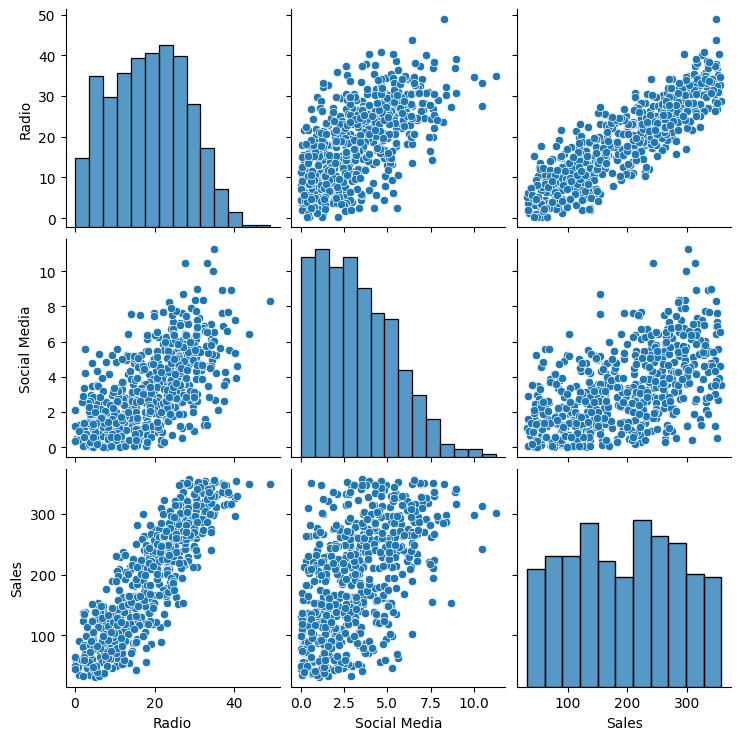

In [ ]:
# Create a pairplot of the data.
sns.pairplot(data);

Which variables have a linear relationship with Sales? Why are some variables in the data excluded from the preceding plot?

Radio and Social Media have a linear relationship with sales, Radio has the most linear relationship, TV and influencer did not appear because it is not numeric variables.

**Calculate the mean sales for each categorical variable**

There are two categorical variables: TV and Influencer. To characterize the relationship between the categorical variables and Sales, find the mean Sales for each category in TV and the mean Sales for each category in Influencer.

In [ ]:
# Calculate the mean sales for each TV category.
print(data.groupby('TV')['Sales'].mean())
print('')

# Calculate the mean sales for each Influencer category .
print(data.groupby('Influencer')['Sales'].mean())

TV
High      300.529591
Low        91.646843
Medium    199.023461
Name: Sales, dtype: float64

Influencer
Macro    205.660047
Mega     180.385096
Micro    198.655080
Nano     190.777766
Name: Sales, dtype: float64


Question: What do you notice about the categorical variables? Could they be useful predictors for Sales?

High TV promotions related to the average sales is very high compared with the others

Influencer has to the profile of a strong predictor because macro, mega, medium and nano influencers are in a very close range of 180-205 million dollars.

These results can be investigated further when fitting the multiple linear regression model.

**Remove missing data**

This dataset contains rows with missing values. To correct this, drop all rows that contain missing data.


In [ ]:
# Drop rows that contain missing data and update the DataFrame.
data = data.dropna(axis=0)

Clean column names

The ols() function doesn’t run when variable names contain a space. Check that the column names in data do not contain spaces and fix them, if needed.

In [ ]:
# Rename all columns in data that contain a space.
data = data.rename(columns={'Social Media': 'Social_Media'})

**Model building**

**Fit a multiple linear regression model that predicts sales**

Using the independent variables of your choice, fit a multiple linear regression model that predicts Sales using two or more independent variables from data.

In [ ]:
# Define the OLS formula.
ols_formula = 'Sales ~ C(TV) + Radio'

# Create an OLS model.
OLS = ols(formula = ols_formula, data = data)

# Fit the model.
model = OLS.fit()

# Save the results summary.
model_results = model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1782.
Date:                Sun, 15 Jun 2025   Prob (F-statistic):          1.61e-287
Time:                        17:20:48   Log-Likelihood:                -2701.4
No. Observations:                 569   AIC:                             5411.
Df Residuals:                     565   BIC:                             5428.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         217.6367      6.577     33.089      0.000     204.718     230.556
C(TV)[T.Low]     -152.0897      5.160    -29.474      0.000    -162.225    -141.954
C(TV)[T.Medium]   -73.4835      3.587    -20.484      0.000     -80.530     -66.437
Radio               2.8864      0.217     13.306      0.000       2.460       3.312
==============================================================================
Omnibus:                       35.219   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.863
Skew:                           0.087   Prob(JB):                     0.000976
Kurtosis:                       2.255   Cond. No.                         155.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Which independent variables did you choose for the model, and why?

 • TV and Radio were selected, as the preceding analysis showed a strong relationship between both variables budget and the average Sales.
• Social Media and Influencer were not selected because it did not increase model performance and there were better predictors.

**Check model assumptions**

 For multiple linear regression, there is an additional assumption added to the four simple linear
 regression assumptions: multicollinearity.

 Check that all five multiple linear regression assumptions are upheld for your model.

**Model assumption: Linearity**

Create scatterplots comparing the continuous independent variable(s) you selected previously with Sales to check the linearity assumption. Use the pairplot you created earlier to verify the linearity assumption or create new scatterplots comparing the variables of interest.


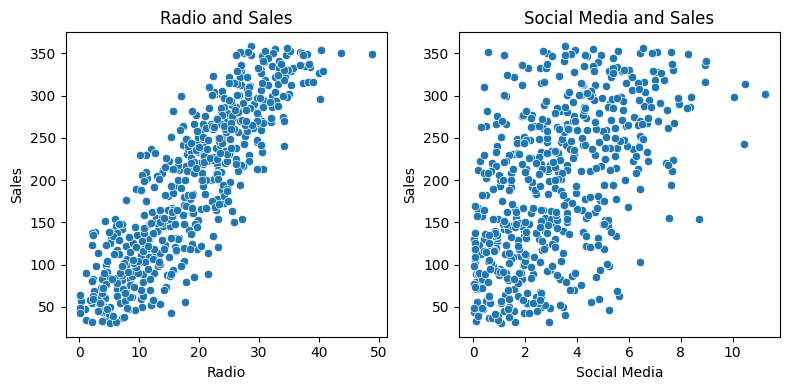

In [ ]:
# Create a scatterplot for each independent variable and the dependent variable.

# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a scatterplot between Radio and Sales.
sns.scatterplot(x = data['Radio'], y = data['Sales'], ax=axes[0])

# Set the title of the first plot.
axes[0].set_title("Radio and Sales")

# Create a scatterplot between Social Media and Sales.
sns.scatterplot(x = data['Social_Media'], y = data['Sales'],ax=axes[1])

# Set the title of the second plot.
axes[1].set_title("Social Media and Sales")

# Set the xlabel of the second plot.
axes[1].set_xlabel("Social Media")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

Is the linearity assumption met?

Radio and Social Media have a liner relationship with Sales. Radio has the strongest.

**Model assumption: Independence**

The independent observation assumption states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

**Model assumption: Normality**

Create the following plots to check the normality assumption:

    • Plot 1: Histogram of the residuals
    • Plot 2: Q-Q plot of the residuals


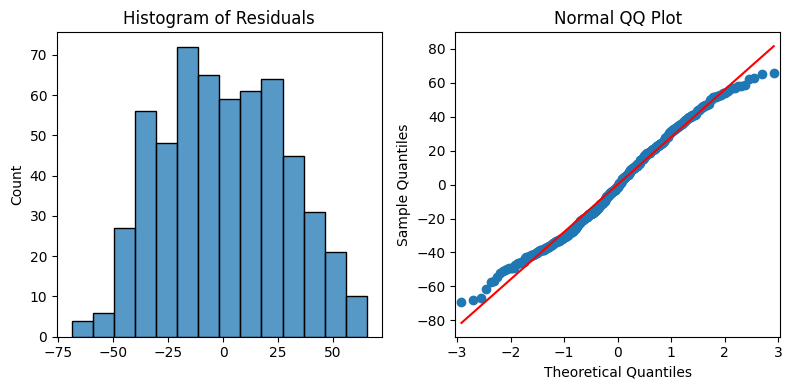

In [ ]:
# Calculate the residuals.
residuals = model.resid

# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a histogram with the residuals.
sns.histplot(residuals, ax=axes[0])

# Set the x label of the residual plot.
axes[0].set_title('Histogram of Residuals')

# Create a Q-Q plot of the residuals.
sm.qqplot(residuals, line ='s', ax = axes[1])

# Set the title of the Q-Q plot.
axes[1].set_title('Normal QQ Plot')

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

# Show the plot
plt.show()

Is the normality assumption met?

As you can see in previous histogram the residuals are closely to normal distribution, also, in the Q-Q plot the residuals shape almost straight line, so, the normality assumption is met for this model.

**Model assumption: Constant variance**

Check that the constant variance assumption is not violated by creating a scatterplot with the fitted values and residuals. Add a line at y = 0 to visualize the variance of residuals above and below y = 0.


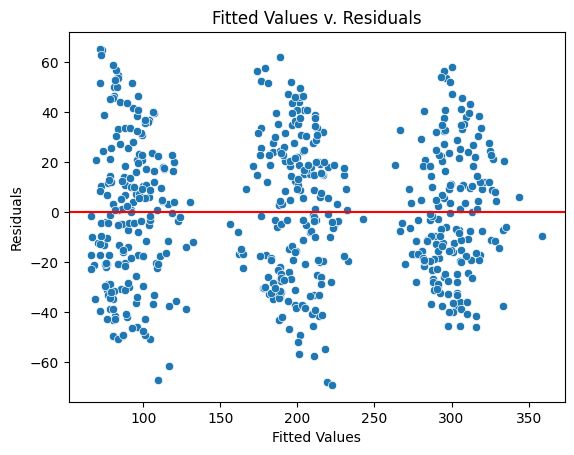

In [ ]:
# Create a scatterplot with the fitted values from the model and the residuals.
fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

# Set the x axis label.
fig.set_xlabel("Fitted Values")

# Set the y axis label.
fig.set_ylabel("Residuals")

# Set the title.
fig.set_title("Fitted Values v. Residuals")
fig.axhline(0, color='r')

# Add a line at y = 0 to visualize the variance of residuals above and below 0.
# Show the plot.
plt.show()

Is the constant variance assumption met?

Variance assumption is met because the data is similarly distributed, even if TV categorical variable shape 3 groups, showing how important is TV in this graph.

 **Model assumption: No multicollinearity**

The no multicollinearity assumption states that no two independent variables (Xi and Xj) can be highly correlated with each other.

Two common ways to check for multicollinearity are to:

    • Create scatterplots to show the relationship between pairs of independent variables
    • Use the variance inflation factor to detect multicollinearity
    
Use one of these two methods to check your model’s no multicollinearity assumption.


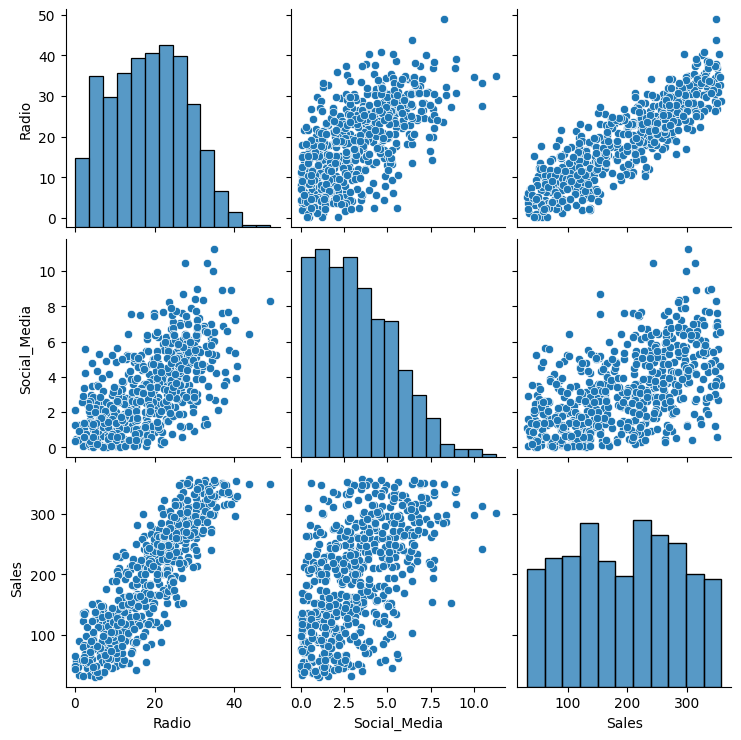

In [ ]:
# Create a pairplot of the data.
sns.pairplot(data)

In [ ]:
# Calculate the variance inflation factor (optional).

# Import variance_inflation_factor from statsmodels.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a subset of the data with the continous independent variables.
X = data[['Radio','Social_Media']]

# Calculate the variance inflation factor for each variable.
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Create a DataFrame with the VIF results for the column names in X.
df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])

# Display the VIF results.
df_vif

,VIF
Radio,4.93238
Social_Media,4.93238


**Note (Gemini):** The variance inflation factor is a metric used to detect multicollinearity in a multiple linear regression model. Multicollinearity occurs when two or more predictor variables (X variables) in a model are highly correlated with each other.

How is it interpreted?

The interpretation of the VIF is generally based on the following points:

VIF = 1: This means there is no correlation between the predictor variable in question and the other predictor variables.
1 < VIF < 5: This suggests a moderate correlation, but it is generally not high enough to cause serious multicollinearity problems.
VIF >= 5 or 10: This indicates a high correlation between the predictor variable and other predictor variables, suggesting the presence of multicollinearity. A common threshold for considering multicollinearity a problem is a VIF of 5 or 10 (the exact value may vary depending on the field and application).

Why is it important?

Multicollinearity can have several negative effects on your regression model:

Unstable coefficients: Estimates of regression coefficients can become unstable and very sensitive to small changes in the data.
Difficulty in interpretation: It can be difficult to interpret the individual effect of a predictor on the response variable, as its effect is intertwined with that of other correlated predictor variables.
Wide confidence intervals: Confidence intervals for coefficients can become very wide, making it difficult to determine whether a predictor has a statistically significant effect.
Reduced statistical power: It can be more difficult to detect whether a predictor has a true effect on the response variable.

Is the no multicollinearity assumption met?

With one independent variable multicollinearity is not a problem, but with Radio and Social Media included the VIF shows a moderate correlation (VIF = 1 < VIF < 5) that violate the multicollinearity assumption.


**Results and evaluation**

Display the OLS regression results
If the model assumptions are met, you can interpret the model results accurately. First, display the OLS regression results.

In [ ]:
# Display the model results summary.
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1782.
Date:                Sun, 15 Jun 2025   Prob (F-statistic):          1.61e-287
Time:                        17:20:48   Log-Likelihood:                -2701.4
No. Observations:                 569   AIC:                             5411.
Df Residuals:                     565   BIC:                             5428.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         217.6367      6.577     33.089      0.000     204.718     230.556
C(TV)[T.Low]     -152.0897      5.160    -29.474      0.000    -162.225    -141.954
C(TV)[T.Medium]   -73.4835      3.587    -20.484      0.000     -80.530     -66.437
Radio               2.8864      0.217     13.306      0.000       2.460       3.312
==============================================================================
Omnibus:                       35.219   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.863
Skew:                           0.087   Prob(JB):                     0.000976
Kurtosis:                       2.255   Cond. No.                         155.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What are the model coefficients?
 When TV and Radio are used to predict Sales, the model coefficients are:

    • β0 =218.5261
    • βTVLow =−154.2971
    • βTVMedium = −75.3120
    • βRadio = 2.9669

How would you write the relationship between Sales and the independent variables as a linear equation?

    Sales = β0 +β1 ∗X1 +β2 ∗X2 +β3∗X3
    Sales = β0 + βTVLow ∗ XTVLow + βTVMedium ∗ XTVMedium + βRadio ∗ XRadio
    Sales = 218.5261 − 154.2971 ∗ XTVLow − 75.3120 ∗ XTVMedium + 2.9669 ∗ XRadio

What is your intepretation of the coefficient estimates? Are the coefficients statistically significant?

As we can see, Medium and Low categories the default category is High TV, the negative symbol in Medium and Low means sales average of both are lower than High TV category while Radio is at similar at same level and this positive value is signal of a positive linear relationship checked previously.

To better understand the model the βTVMedium means a prediction of 75.3120 lower on average related to High TV promotion. Also, the model shows p-values of 0.000, it can be considered as there is a statistically significant in all the variables, we can say there is a 95% chance to find the real value between confidence intervals in each case.

Why is it important to interpret the beta coefficients?

It is important to estimate the value and direction of the weight of each independent variable related to the dependent variable, this estimation can be used to provide insight to stakeholders about quantitative relations between variables.

What are you interested in exploring based on your model? Potential areas to explore include:

    • Providing the business with the estimated sales given different TV promotions and radio budgets
    • Additional plots to help convey the results, such as using the seaborn regplot() to plot the data with a best fit regression line

Do you think your model could be improved? Why or why not? How?

Maybe focusing on TV promotion, which is the most important, and adding new categories related time and locations to specify where the bigger weight is to predict sales increasing.

**Considerations**

    • Multiple linear regression is a powerful tool to estimate a dependent continuous variable from several independent variables.
    • Exploratory data analysis is useful for selecting both numeric and categorical features for multiple linear regression.
    • Fitting multiple linear regression models may require trial and error to select variables that fit an accurate model while maintaining model assumptions.

What findings would you share with others?

    • The multiple linear regression model shows that the variable with the most important impact is High tv promotions related to Sales.
    • The model predicts that this variable is approximately 75.3120 and 154.2971 more than Medium and Low TV promotion respectively.
    •Radio can increase Sales almost 3 times the money invested.
    • The + or – signal represents the positive or negative relationship with High TV promotional budged.
    • This prediction is supported by very low p-value (0.000) using a 95% confidence level, the chance of finding the real slope values in the respective intervals.

How would you frame your findings to stakeholders?

High TV promotional is highly recommended to increase Sales, the model predicts more Sales than Medium and Low TV promotion, \$75.3120 million dollars with 95% confidence level [−82.431,−68.193] and \$154.297 million dollar with 95 confidence level [−163.979,−144.616] respectively. Radio can increase Sales almost 3 times the money invested, per 1 million dollar $2.9669 million sales increasing with 95% confidence level  [2.551, 3.383]).

By that reason Hight TV promotional and Radio are recommended in that order.

References Saragih, H.S. (2020). Dummy Marketing and Sales Data.


## Logistic regression model

#### Binomial logistic regression I

Relevant imports

In [ ]:
# Import pandas and seaborn packages
import pandas as pd
import seaborn as sns

Exploratory data analysis

Note: The following code cell is shown in the video, but it will only work if the .csv file is in the same folder as the notebook. Otherwise, please follow the data loading process outlined above.

In [ ]:
# Load in if csv file is in the same folder as notebook
activity = pd.read_csv("/content/activity.csv")

# Examine the dataset
print(activity.head(5))
print()

# Get summary statistics about the dataset
print(activity.describe())

   Acc (vertical)  LyingDown
0          96.229          0
1          84.746          0
2          82.449          0
3         106.560          0
4          80.152          0

       Acc (vertical)   LyingDown
count      494.000000  494.000000
mean        45.512363    0.516194
std         44.799360    0.500244
min        -48.459000    0.000000
25%          0.918650    0.000000
50%         41.109500    1.000000
75%         89.339000    1.000000
max        112.310000    1.000000


Construct binomial logistic regression model

For binomial logistic regression, we’ll be using the scikit-learn package, which is frequently used for machine learning and more advanced data science topics. For the purposes of this exercise, we’ll only load in the functions we need: train_test_split() and LogisticRegression().


In [ ]:
# Load in sci-kit learn functions for constructing logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Then, we’ll save the data into variables called X and y so we can use the train_test_split() function more easily. Remember that you can subset specific columns of a DataFrame object by using double square brackets: [[]] and listing the columns in between, separated by commas.

In [ ]:
# Save X and y data into variables
X = activity[["Acc (vertical)"]]
y = activity[["LyingDown"]]

Then we’ll split the data into training and holdout datasets. We set the test_size to 0.3 so that the holdout dataset is only 30% of the total data we have. We’ll set the random_state equal to 42.

If you change this variable, then your results will be different from ours. Setting the random_state is mainly for reproducibility purposes.


In [ ]:
# Split dataset into training and holdout datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

Then we’ll build our classifier, and fit the model to the data by using the .fit() function. We’ll save the fitted model as a variable called clf.

In [ ]:
clf = LogisticRegression().fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Get coefficients and visualize model**

 We can use the coef_ and intercept_ attributes of the clf object to get the coefficient and intercept of our model.


In [ ]:
# Print the coefficient
clf.coef_

array([[-0.1177471]])

In [ ]:
# Print the intercept
clf.intercept_

array([6.10180958])

So, based on what we’ve found, our model has an intercept or β0 of 6.10 and a β1 of-0.12. Now we can plot our model and data with a 95% confidence band using the regplot() function from the seaborn package. Remember to set the argument logistic=True so that the function knows we are plotting a logistic regression model, not a linear regression model.

<Axes: xlabel='Acc (vertical)', ylabel='LyingDown'>

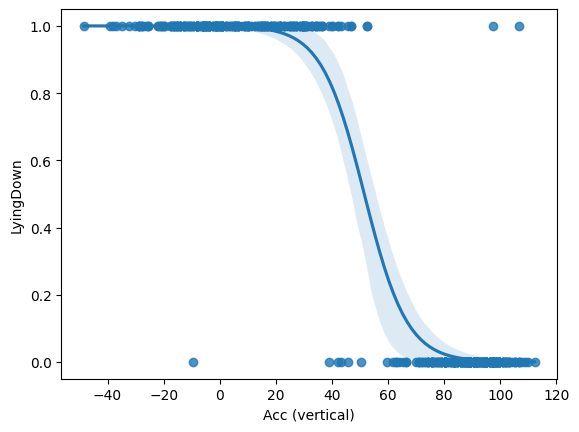

In [ ]:
# Plot the logistic regression and its confidence band
sns.regplot(x="Acc (vertical)", y="LyingDown", data=activity, logistic=True)

**Confusion matrix (Part II)**

This part of the notebook contains all of the code that will be presented in the second part of this section in the course. The focus is on confusion matrices, which are used to evaluate classification models, such as a binomial logistic regression model.

**Note:** We are assuming that the earlier parts of this notebook have been run, and that the existing variables and imported packages have been saved.

**Construct logistic regression model**

Once again, we split our data, which is currently saved as variables X and y, into training and holdout datasets using the train_test_split() function. The function has already been imported from the scikit-learn package. Then, we build the model by using the LogisticRegression() function with the .fit() function.

Next, we can save our model’s predictions by inputting the holdout sample, X_test into the model’s .predict() function.


In [ ]:
# Split data into training and holdout samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

# Build regression model
clf = LogisticRegression().fit(X_train,y_train)

# Save predictions
y_pred = clf.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


We can print out the predicted labels by just calling on clf.predict(X_test). Recall that 0 means not lying down, and 1 means lying down.

In [ ]:
# Print out the predicted labels
clf.predict(X_test)

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1])

But, the model actually calculates a probability that given a particular value of X, the person is lying down. We can print out the predicted probabilities with the following line of code. You can read more about the LogisticRegression() function, its attributes, and related functions on the scikit-learn website.

In [ ]:
# Print out the predicted probabilities
clf.predict_proba(X_test)[::,-1]

array([2.31690858e-02, 9.97511643e-01, 1.04280601e-02, 1.05669826e-03,
       9.99781265e-01, 1.04280601e-02, 4.66008916e-03, 9.95733982e-01,
       9.72344491e-01, 2.31690858e-02, 9.97825656e-01, 1.36210414e-02,
       3.43613958e-02, 9.95733982e-01, 9.98892897e-01, 5.75926041e-02,
       4.77299711e-01, 6.09785081e-03, 9.98732818e-01, 9.92695803e-01,
       3.91400562e-02, 9.31713690e-01, 9.64064069e-01, 1.55636152e-02,
       9.83708684e-01, 1.19193813e-02, 7.55109695e-01, 8.74058541e-01,
       3.43613958e-02, 9.91646480e-01, 1.77761812e-02, 1.19193813e-02,
       9.97152398e-01, 2.64338338e-02, 9.98892897e-01, 1.19193813e-02,
       9.31713690e-01, 9.95119380e-01, 9.00936838e-01, 9.22595259e-01,
       8.39842140e-02, 9.99624404e-01, 1.19193813e-02, 8.01630725e-01,
       5.33097419e-03, 1.36210414e-02, 3.01444198e-02, 3.55969345e-03,
       4.07280935e-03, 1.19193813e-02, 9.98892897e-01, 6.53832873e-02,
       4.07280935e-03, 9.98892897e-01, 9.12054235e-03, 9.53423143e-01,
      

**Create confusion matrix**

 To finish this part of the course, we’ll create a confusion matrix. Recall the following definition:

** • Confusion matrix:** A graphical representation of how accurate a classifier is at predicting
 the labels for a categorical variable.

 To create a confusion matrix, we’ll use the confusion_matrix() function from the metrics module of scikit-learn. To use the function, we’ll need to input the following: * Actual labels of the holdout sample, stored as y_test * Predicted labels of the holdout sample, stored as y_pred * The names of the labels, which you can access using clf.classes_

 Note: If there were more classes, we would have more numbers or labels in clf.classes_. Since
 this is a binomial logistic regression, there are only two labels, 0 and 1.

In [ ]:
# Import the metrics module from scikit-learn
import sklearn.metrics as metrics

# Calculate the values for each quadrant in the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)

# Create the confusion matrix as a visualization
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)

In order to understand and interpret the numbers in the below confusion matrix, it is important to keep the following in mind:

 • The upper-left quadrant displays the number of true negatives.

 • The bottom-left quadrant displays the number of false negatives.

 • The upper-right quadrant displays the number of false positives.

 • The bottom-right quadrant displays the number of true positives.

 We can define the above bolded terms as follows in our given context: * True negatives: The number of people that were not lying down that the model accurately predicted were not lying down. * False negatives: The number of people that were lying down that the model inaccurately predicted were not lying down. * False positives: The number of people that were not lying down that the model inaccurately predicted were lying down. * True positives: The number of people that were lying down that the model accurately predicted were lying down.

 A perfect model would yield all true negatives and true positives, and no false negatives or false positives.


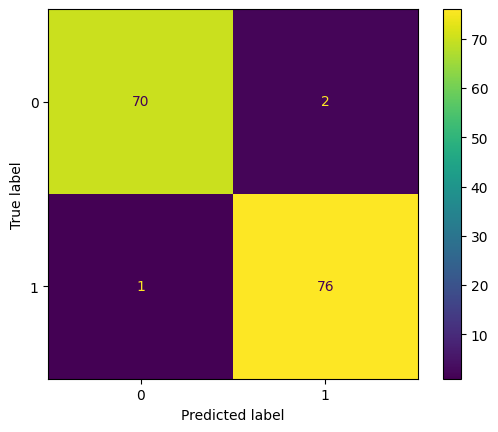

In [ ]:
# Display the confusion matrix
disp.plot()

** Iterpretation of confusion matrix**

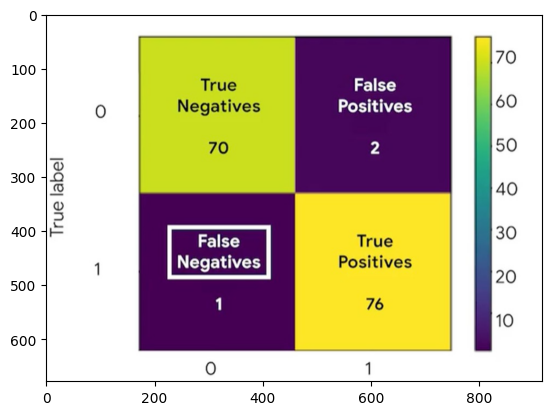

In [ ]:
# Upload imagen to analize confusion matrix

# import libraries
from PIL import Image
import matplotlib.pyplot as plt

# Upload the image:
imagen = Image.open("/content/Confusion matrix.jpg")

# Show imagen
plt.imshow(imagen)
plt.show()

Import metrix

In [ ]:
import sklearn.metrics as metrics

# Precision score
print('Precision:', f"{(round(metrics.precision_score(y_test, y_pred), 2)*100):.0f}%",'truly positives' )
print()

# Recall score
print('Recall:', f"{(round(metrics.recall_score(y_test, y_pred), 2)*100):.0f}%", 'positives correctly identified')
print()

# Accuracy score
print('Accuracy:', f"{(round(metrics.accuracy_score(y_test, y_pred), 2)*100):.0f}%", 'data points classified correctly')
print()

# F1 score
print('F1:', f"{(round(metrics.f1_score(y_test, y_pred), 2)*100):.0f}%", 'very close from 1, almost perfect precision and recall balance')

Precision: 97% truly positives

Recall: 99% positives correctly identified

Accuracy: 98% data points classified correctly

F1: 98% very close from 1, almost perfect precision and recall balance


#### Binomial logistic regression II

For this activity, you work as a consultant for an airline. The airline is interested in knowing if a better in-flight entertainment experience leads to higher customer satisfaction. They would like you to construct and evaluate a model that predicts whether a future customer would be satisfied with their services given previous customer feedback about their flight experience.

The data for this activity is for a sample size of 129,880 customers. It includes data points such as class, flight distance, and in-flight entertainment, among others. Your goal will be to utilize a binomial logistic regression model to help the airline model and better understand this data.

 Because this activity uses a dataset from the industry, you will need to conduct basic EDA, data cleaning, and other manipulations to prepare the data for modeling.

 In this activity, you will practice the following skills:

 • Importing packages and loading data

 • Exploring the data and completing the cleaning process

 • Building a binomial logistic regression model

 • Evaluating a binomial logistic regression model using a confusion matrix


Step 1: Imports

**Import packages**

Import relevant Python packages. Use train_test_split, LogisticRegression, and various imports from sklearn.metrics to build, visualize, and evalute the model.


In [1]:
# Standard operational package imports.
import numpy as np
import pandas as pd

# Important imports for preprocessing, modeling, and evaluation.
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

# Visualization package imports.
import matplotlib.pyplot as plt
import seaborn as sns

**Load the dataset**

Load the Invistico_Airline.csv dataset. Save the resulting pandas DataFrame in a variable named df_original.


In [7]:
df_original = pd.read_csv("/content/Invistico_Airline.csv")
df_original.head(n = 5)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


**Output the first 5 rows**

**Explore the data**

Check the data type of each column. Note that logistic regression models expect numeric data.

In [ ]:
df_original.head(n = 5)

**Data exploration, data cleaning, and model preparation**

 **Prepare the data**

 After loading the dataset, prepare the data to be suitable for a logistic regression model. This
 includes:

 • Exploring the data

 • Checking for missing values

 • Encoding the data

 • Renaming a column

 • Creating the training and testing data

 **Explore the data**

 Check the data type of each column. Note that logistic regression models expect numeric data.


In [5]:
df_original.dtypes

  satisfaction   Customer Type  Age   Type of Travel     Class  \
0    satisfied  Loyal Customer   65  Personal Travel       Eco   
1    satisfied  Loyal Customer   47  Personal Travel  Business   
2    satisfied  Loyal Customer   15  Personal Travel       Eco   
3    satisfied  Loyal Customer   60  Personal Travel       Eco   
4    satisfied  Loyal Customer   70  Personal Travel       Eco   

   Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0              265             0                                  0   
1             2464             0                                  0   
2             2138             0                                  0   
3              623             0                                  0   
4              354             0                                  0   

   Food and drink  Gate location  ...  Online support  Ease of Online booking  \
0               0              2  ...               2                       3   
1             

**Check the number of satisfied customers in the dataset**

To predict customer satisfaction, check how many customers in the dataset are satisfied before modeling.


In [6]:
df_original['satisfaction'].value_counts(dropna = False)

,count
satisfaction,
satisfied,71087
dissatisfied,58793


**Question:** How many satisfied and dissatisfied customers were there?

 71,087 satisfied customers & 58,793 dissatisfied customers.

 **Question:** What percentage of customers were satisfied?

 54.7% (71,087/129,880) customers satisfied.

**Note:** While this is a simple calculation, this value can be compared to a logistic regression model’s accuracy.

 **Check for missing values**

An assumption of logistic regression models is that there are no missing values. Check for missing values in the rows of the data.


In [ ]:
df_original.isnull().sum()

**Question:** Should you remove rows where the Arrival Delay in Minutes column has missing values, even though the airline is more interested in the inflight entertainment column?

For this activity, the airline is specifically interested in knowing if a better in-flight entertainment experience leads to higher customer satisfaction. The Arrival Delay in Minutes column won’t be included in the binomial logistic regression model; however, the airline might become interested in this column in the future.

For now, the missing values should be removed for two reasons:

    • There are only 393 missing values out of the total of 129,880, so these are a small percentage
 of the total.

    • This column might impact the relationship between entertainment and satisfaction.

**Drop the rows with missing values**

Drop the rows with missing values and save the resulting pandas DataFrame in a variable named df_subset.


In [12]:
df_subset = df_original.dropna(axis=0).reset_index(drop = True)
df_subset.isna().sum()

,0
satisfaction,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Seat comfort,0
Departure/Arrival time convenient,0
Food and drink,0
Gate location,0


**Prepare the data**

If you want to create a plot (sns.regplot) of your model to visualize results later in the notebook, the independent variable Inflight entertainment cannot be “of type int” and the dependent variable satisfaction cannot be “of type object.”

Make the Inflight entertainment column “of type float.”


In [14]:
df_subset = df_subset.astype({"Inflight entertainment": float})
df_subset['Inflight entertainment'].dtypes

dtype('float64')

**Convert the categorical column satisfaction into numeric**

Convert the categorical column satisfaction into numeric through one-hot encoding.

In [15]:
df_subset['satisfaction'] = OneHotEncoder(drop='first').fit_transform(df_subset[['satisfaction']]).toarray()
df_subset['satisfaction'].dtypes

dtype('float64')

**Output the first 5 rows of df_subset**

To examine what one-hot encoding did to the DataFrame, output the first 10 rows of df_subset.


In [16]:
df_subset.head(5)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,1.0,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,1.0,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,1.0,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,1.0,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


**Create the training and testing data**

Put 70% of the data into a training set and the remaining 30% into a testing set. Create an X and y DataFrame with only the necessary variables.


In [19]:
X = df_subset[["Inflight entertainment"]]
y = df_subset["satisfaction"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

**Question:** If you want to consider customer satisfaction with your model, should you train your model to use inflight entertainment as your sole independent variable?

Maybe Departure Delay in Minutes is potentially influential to customer satisfaction, always there is a chance of missing something.

 **Step 3: Model building**

 Fit a LogisticRegression model to the data

 Build a logistic regression model and fit the model to the training data.


In [20]:
clf = LogisticRegression().fit(X_train,y_train)

 **Obtain parameter estimates**

 Make sure you output the two parameters from your model.

In [21]:
clf.coef_

array([[0.99752883]])

In [22]:
 clf.intercept_

array([-3.19359054])

**Create a plot of your model**

Create a plot of your model to visualize results using the seaborn package.

<Axes: xlabel='Inflight entertainment', ylabel='satisfaction'>

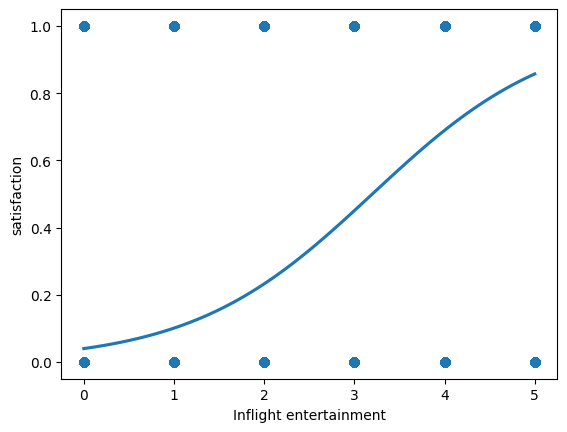

In [23]:
sns.regplot(x="Inflight entertainment", y="satisfaction", data=df_subset, logistic=True, ci=None)

**Question:** What can you tell from the graph?

There is a positive relationship between both variables, but this is not the best graph to check it.


**Results and evaluation**

**Predict the outcome for the test dataset**

Now that you’ve completed your regression, review and analyze your results. First, input the holdout dataset into the predict function to get the predicted labels from the model. Save these predictions as a variable called y_pred.


In [24]:
# Save predictions.
y_pred = clf.predict(X_test)

**Print out y_pred**

In order to examine the predictions, print out y_pred.

In [25]:
print(y_pred)

[1. 0. 0. ... 0. 0. 0.]


Use the predict_proba and predict functions on X_test

In [26]:
# Use predict_proba to output a probability.
clf.predict_proba(X_test)

array([[0.14257646, 0.85742354],
       [0.55008251, 0.44991749],
       [0.89989529, 0.10010471],
       ...,
       [0.89989529, 0.10010471],
       [0.76826369, 0.23173631],
       [0.55008251, 0.44991749]])

In [27]:
# Use predict to output 0's and 1's.
clf.predict(X_test)

array([1., 0., 0., ..., 0., 0., 0.])

**Analyze the results**

Print out the model’s accuracy, precision, recall, and F1 score.

In [28]:
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

Accuracy: 0.801529
Precision: 0.816142
Recall: 0.821530
F1 Score: 0.818827


**Produce a confusion matrix**

Data professionals often like to know the types of errors made by an algorithm. To obtain this information, produce a confusion matrix.

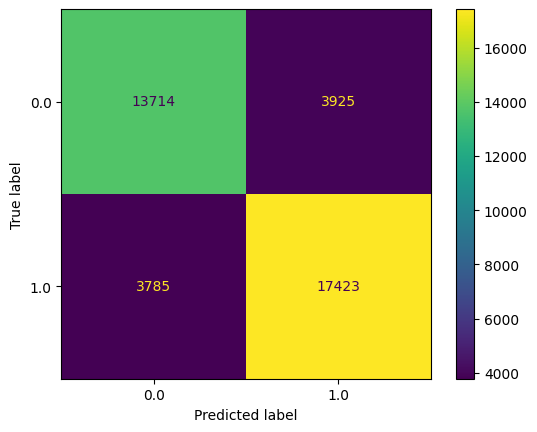

In [29]:
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)
disp.plot()

**Question:** What stands out to you about the confusion matrix?

There is just a difference of 0.3 e+3 between positive values, and almost one magnitude order related to false values which are very close to each other.  According to data, under 4000 is a low value for false cases and more than 14000 is high value for positive cases.

**Question:** Did you notice any difference in the number of false positives or false negatives that the model produced?

Yes, I did, there is a big difference between both.

 **Question:** What do you think could be done to improve model performance?

 Using more than a single independent variable in the model training process could improve model performance. This is because other variables, like Departure Delay in Minutes, seem like they could potentially influence customer satisfaction.

**Considerations**

 What are some key takeaways that you learned from this lab? * A lot of machine learning workflows are about cleaning, encoding, and scaling data. * The approach you use to plot or graph your data may depend on the type of variable you are evaluating. * Training a logistic regression model on a single independent variable can produce a relatively good model (80.2 percent accuracy).

 What findings would you share with others? * Logistic regression accurately predicted satisfaction 80.2 percent of the time. * The confusion matrix is useful, as it displays a similar amount of true positives and true negatives.

What would you recommend to stakeholders?  *Customerswhoratedin-flight entertainment highly were more likely to be satisfied. Improving in-flight entertainment should lead to better customer satisfaction. * The model is 80.2 percent accurate. This is an improvement over the dataset’s customer satisfaction rate of 54.7 percent. * The success of the model suggests that the airline should invest more in model developement to examine if adding more independent variables leads to better results. Building this model could not only be useful in predicting whether or not a customer would be satisfied but also lead to a better understanding of what independent variables lead to happier customers.
